In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
expected_queries_results_file = "../results/expected_queries_results.csv"
queries_results_file = "../results/resultados.csv"
df_expected_queries_results = pd.read_csv(expected_queries_results_file, sep=';', index_col=0)
df_queries_results = pd.read_csv(queries_results_file, sep=';', index_col=0)

df_expected_queries_results

,DocNumber,DocVotes
QueryNumber,,
1,139,7
1,151,6
1,166,1
1,311,1
1,370,2
...,...,...
100,1000,6
100,1017,7
100,1033,1


In [8]:
df_queries_results

,Results
QueryNumber,
1,"[0, '00856', 1.659808955858027]"
1,"[1, '00333', 1.5849030426248878]"
1,"[2, '00498', 1.570976635522687]"
1,"[3, '00568', 1.5148111246159803]"
1,"[4, '00386', 1.463274145456985]"
...,...
100,"[1210, '01097', 0.1325431678967643]"
100,"[1211, '00558', 0.1290865694610643]"
100,"[1212, '00781', 0.1256765649854486]"


In [9]:
def get_doc_number_from_result(result):
  result_list = result.strip("[]").replace("'", "").split(", ")
  doc_number = int(result_list[1])
  
  return doc_number

df_queries_results["DocNumber"] = df_queries_results["Results"].apply(get_doc_number_from_result)

df_queries_results

,Results,DocNumber
QueryNumber,,
1,"[0, '00856', 1.659808955858027]",856
1,"[1, '00333', 1.5849030426248878]",333
1,"[2, '00498', 1.570976635522687]",498
1,"[3, '00568', 1.5148111246159803]",568
1,"[4, '00386', 1.463274145456985]",386
...,...,...
100,"[1210, '01097', 0.1325431678967643]",1097
100,"[1211, '00558', 0.1290865694610643]",558
100,"[1212, '00781', 0.1256765649854486]",781


In [10]:
expected_results_per_query = df_expected_queries_results.groupby("QueryNumber").apply(lambda x: x.values.tolist()).tolist()
results_per_query = df_queries_results.groupby("QueryNumber")["DocNumber"].apply(lambda x: x.tolist()).tolist()

print(f"Expected results len: {len(expected_results_per_query)}")
print(f"Results len: {len(results_per_query)}")

Expected results len: 99
Results len: 99


## Precision x Recall

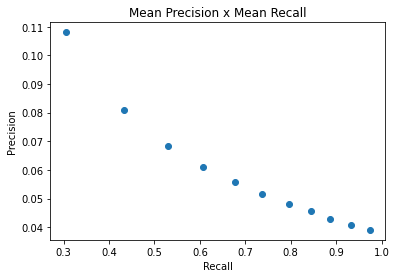

In [11]:
number_of_points = 11
mean_precisions = []
mean_recalls = []

for query_index in range(len(results_per_query)):
  query_relevant_documents = [result[0] for result in expected_results_per_query[query_index]]
  query_results = results_per_query[query_index]

  query_precisions = []
  query_recalls = []

  incremental_results_index = int(len(query_results)/number_of_points)

  for i in range(number_of_points):
    results_ranking = query_results[:(i+1)*incremental_results_index]

    tp = len(list(set(query_relevant_documents).intersection(results_ranking)))
    
    query_precisions.append(tp/len(results_ranking))
    query_recalls.append(tp/len(query_relevant_documents))

  mean_precisions.append(query_precisions)
  mean_recalls.append(query_recalls)

mean_precisions = np.mean(np.array(mean_precisions), axis=0)
mean_recalls = np.mean(np.array(mean_recalls), axis=0)

plt.scatter(mean_recalls, mean_precisions)
plt.title("Mean Precision x Mean Recall")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()


34